In [1]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


Matplotlib is building the font cache; this may take a moment.


In [3]:
df=pd.read_csv('data\stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
#check for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
#check for duplicate values
df.duplicated().sum()


0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
#checking the no of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [22]:
#statistical summary-only for numerical columns
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [25]:
print("categoies in gender column:", df['gender'].unique())
#no of unique categorie in each column
print("categoies in race/ethnicity column:", df['race_ethnicity'].unique())
print("categoies in parental level of education column:", df['parental_level_of_education'].unique())
print("categoies in lunch column:", df['lunch'].unique())
print("categoies in test preparation course column:", df['test_preparation_course'].unique())

categoies in gender column: ['female' 'male']
categoies in race/ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']
categoies in parental level of education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categoies in lunch column: ['standard' 'free/reduced']
categoies in test preparation course column: ['none' 'completed']


In [29]:
#define numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O'] 

In [30]:
numeric_features

['math_score', 'reading_score', 'writing_score']

In [31]:
categorical_features    

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [ ]:
#adding column total score
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score/300
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218
1,female,group C,some college,standard,completed,69,90,88,247,247
2,female,group B,master's degree,standard,none,90,95,93,278,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148
4,male,group C,some college,standard,none,76,78,75,229,229


In [34]:
df.drop(['total_score/300'],axis=1,inplace=True)

In [40]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
df['average']=df['total_score']/3
#now the avg and total score columns are added to the dataframe
#they are dependent variables for our analysis
#and rest all are independent variables

In [45]:
reading_full=df[df['reading_score']==100].count()
print("no of students with full score in reading:",reading_full[0])
math_full=df[df['math_score']==100].count()
print("no of students with full score in math:",math_full[0])
writing_full=df[df['writing_score']==100].count()
print("no of students with full score in writing:",writing_full[0])

no of students with full score in reading: 17
no of students with full score in math: 7
no of students with full score in writing: 14


In [46]:
reading_less_20=df[df['reading_score']<=20].count()
print("no of students with less than 20 score in reading:",reading_less_20[0])
math_less_20=df[df['math_score']<=20].count()    
print("no of students with less than 20 score in math:",math_less_20[0])
writing_less_20=df[df['writing_score']<=20].count()
print("no of students with less than 20 score in writing:",writing_less_20[0])

no of students with less than 20 score in reading: 1
no of students with less than 20 score in math: 4
no of students with less than 20 score in writing: 3


 HISTOGRAM AND KDE

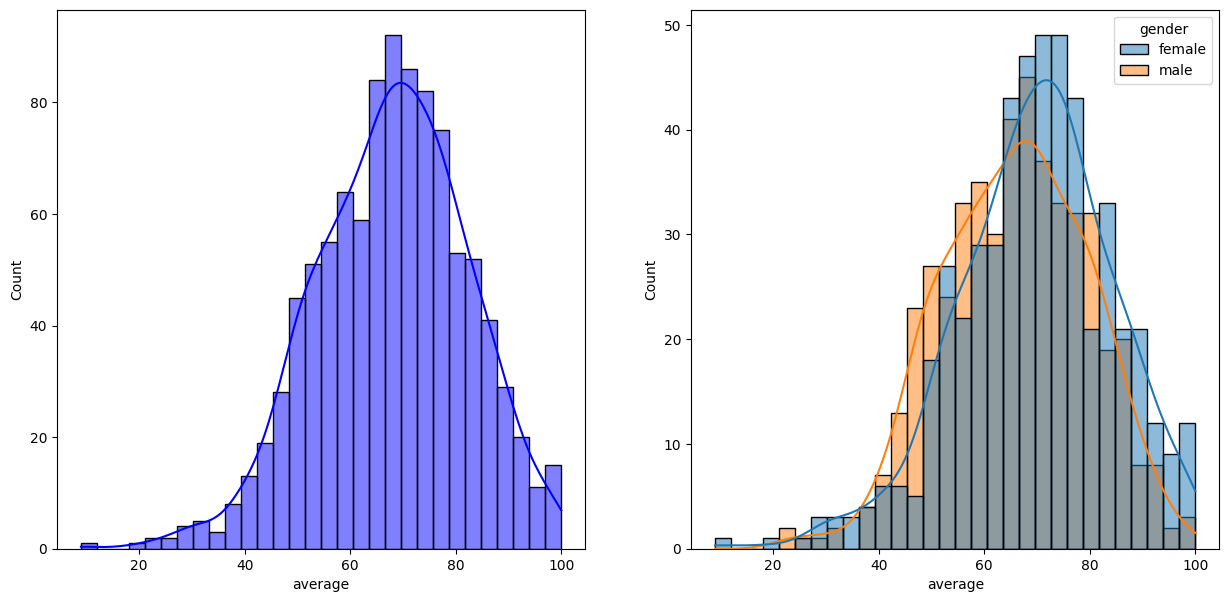

In [60]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',kde=True,bins=30,color='blue')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',kde=True,bins=30,color='green',hue='gender')
plt.show()

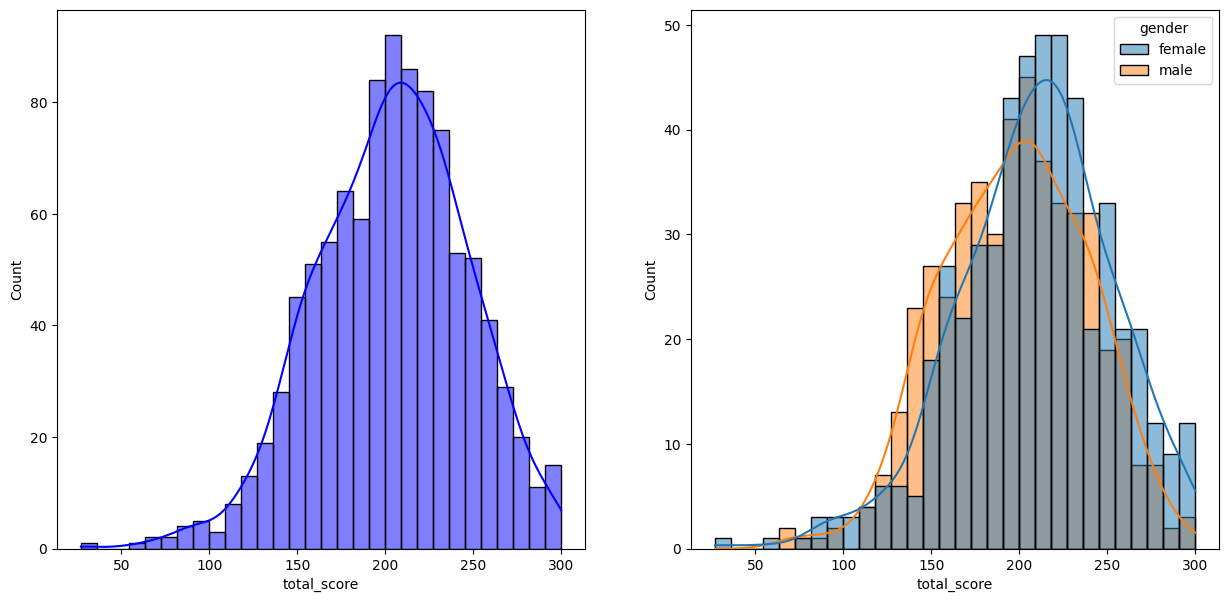

In [64]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
#creates a figurev with 1 rows and 2 columns
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',kde=True,bins=30,color='blue')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',kde=True,bins=30,color='green',hue='gender')
plt.show()

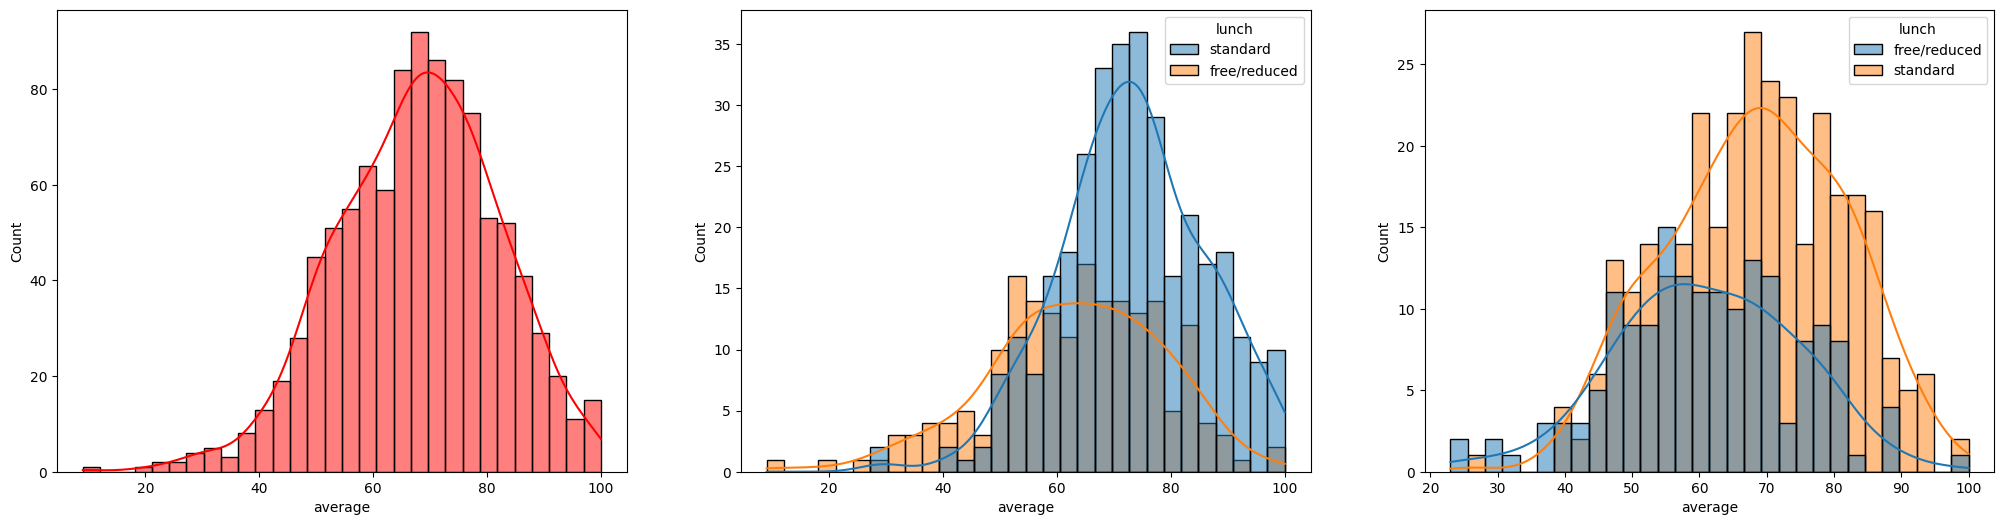

In [65]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average',kde=True,bins=30,color='red')
plt.subplot(1,3,2)  
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,bins=30,color='blue',hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,bins=30,color='green',hue='lunch')
plt.show()